Este colab fue desarrollado por Arnold Charry Armero.

# Proyección de Tendencia (Regresión Lineal)

Esta técnica de pronósticos ajusta los datos de una serie de tiempo a una recta de tendencia para después realizar una proyección hacia el futuro de los datos. Aplicando el método estadístico de Mínimos Cuadrados se emplea la ecuación de la recta para minimizar la suma de los cuadrados y, de este manera, minimizar el error (la diferencia entre el dato de la recta y la observación puntual). Matemáticamente se modela así:

$$ \hat{y} = a + bx $$

donde,


$ \hat{y} = \mathrm{Valor \: calculado \: de \: la \: variable \: predicha} $

$ a = \mathrm{Interseccion \: con \: el \: eje \: y} $

$ b = \mathrm{Pendiente \: de \: la \: recta \: de \: regresion} $

$ x = \mathrm{Variable \: independiente \: (tiempo)} $


Para calcular y obtener el estadístico b, se utilizan la ecuación matemática siguiente:

$$ b = \frac{\sum xy - n \bar{x} \bar{y}}{\sum x^{2} - n\bar{x}^{2}} $$



Y para obtener la intersección con el eje y se utiliza la siguiente ecuación:

$$ a = \bar{y} - b\bar{x} $$

donde,

$ y = \mathrm{Valores \: conocidos \: de \: la \: variable \: dependiente} $

$ x = \mathrm{Valores \: conocidos \: de \: la \: variable \: independiente} $

$ \bar{y} = \mathrm{Promedio \: de \: los \: valores \: de \: y} $

$ \bar{x} = \mathrm{Promedio \: de \: los \: valores \: de \: x} $

$ n = \mathrm{Cantidad \: de \: datos \: u \: observaciones} $

Ahora se continúa con la implementación en código.

In [1]:
#Se importan las librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

In [2]:
#Conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Se ingresa la base de datos
df = pd.read_csv("/content/drive/MyDrive/Operations I/sales-cars.csv")
df.head(10)

,Month,Sales
0,2016-01,266.0
1,2016-02,146.0
2,2016-03,183.0
3,2016-04,119.0
4,2016-05,180.0
5,2016-06,169.0
6,2016-07,232.0
7,2016-08,225.0
8,2016-09,193.0
9,2016-10,123.0


In [4]:
#Se pasa al formato de series de tiempo
df["Month"] = pd.to_datetime(df.iloc[:, 0], format = '%Y/%m')
df.head(10)

,Month,Sales
0,2016-01-01,266.0
1,2016-02-01,146.0
2,2016-03-01,183.0
3,2016-04-01,119.0
4,2016-05-01,180.0
5,2016-06-01,169.0
6,2016-07-01,232.0
7,2016-08-01,225.0
8,2016-09-01,193.0
9,2016-10-01,123.0


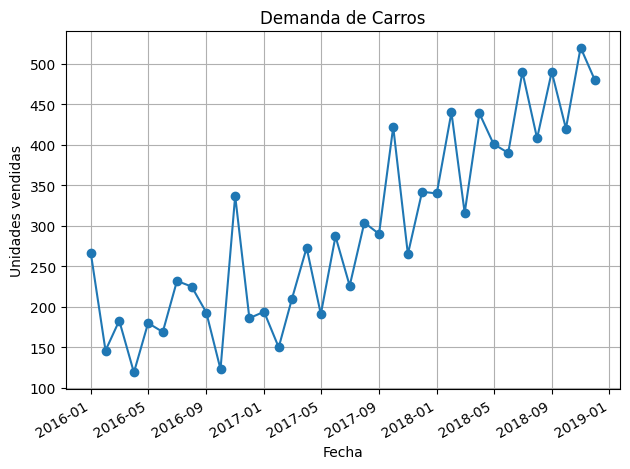

In [5]:
#Se realiza el gráfico de los datos
plt.plot_date(df.iloc[:, 0], df.iloc[:, 1], linestyle = 'solid')
plt.gcf().autofmt_xdate()

plt.title("Demanda de Carros")
plt.xlabel("Fecha")
plt.ylabel("Unidades vendidas")

plt.grid()
plt.tight_layout()
plt.show()

In [6]:
# Se crea una instancia de tiempo pero sin fechas
Number_Months = []

for i in range(df.shape[0]):
  Number_Months.append(i + 1)

df.insert(loc = 1, column = "Número del Mes", value = Number_Months)
df

,Month,Número del Mes,Sales
0,2016-01-01,1,266.0
1,2016-02-01,2,146.0
2,2016-03-01,3,183.0
3,2016-04-01,4,119.0
4,2016-05-01,5,180.0
5,2016-06-01,6,169.0
6,2016-07-01,7,232.0
7,2016-08-01,8,225.0
8,2016-09-01,9,193.0
9,2016-10-01,10,123.0


In [7]:
# Obteniendo b
def Obtener_Pendiente(x, y):
  """
  Calcula la pendiente b de dos listas de
  datos.

  Args:
    x: Lista con las fechas o tiempos de
    los datos.
    y: Lista con los datos de la serie de
    tiempo.

  Returns:
    b: Pendiente de la recta de regresión lineal
  """

  n = df.shape[0] - 1
  xy = 0
  for i in range(n):
    xy += df.iloc[i, x] * df.iloc[i, y]

  x2 = 0
  for i in range(n):
    x2 += df.iloc[i, x] **2

  sumx = 0
  for i in range(n):
    sumx += df.iloc[i, x]

  averagex = sumx / n

  sumy = 0
  for i in range(n):
    sumy += df.iloc[i, y]

  averagey = sumy / n

  b = (xy - n * averagex * averagey) / (x2 - n * averagex ** 2)

  return b

In [8]:
# Se obtiene la pendiente
b = Obtener_Pendiente(1, 2)
print(b)

9.711840411840411


In [9]:
# Se obtiene la intersección con el eje y, el valor de a

def Obtener_Interseccion(b, x, y):
  """
  Calcula el intersecto a de dos listas de
  datos.

  Args:
    b: Pendiente de la recta de regresión lineal
    x: Lista con las fechas o tiempos de
    los datos.
    y: Lista con los datos de la serie de
    tiempo.

  Returns:
    a: Valor de intersección de la recta de
    regresión lineal
  """

  n = df.shape[0] - 1
  sumx = 0
  for i in range(n):
    sumx += df.iloc[i, x]

  averagex = sumx / n

  sumy = 0
  for i in range(n):
    sumy += df.iloc[i, y]

  averagey = sumy / n

  a = averagey - b * averagex

  return a

In [10]:
a = Obtener_Interseccion(b, 1, 2)
print(a)

116.0809523809524


Ahora, para estimar la demanda en los próximos meses, sólo se crea la función lineal.

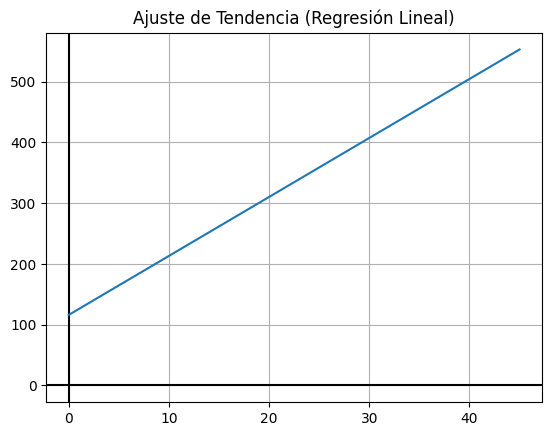

In [11]:
def Linear_Regression(x):
  """
  Calcula los valores y de la recta de
  Regresión Lineal (Variable dependiente)

  Args:
    x: Valor en el tiempo a evaluar.

  Returns:
    y: Pronóstico en el tiempo determinado
    por x.
  """
  return a + b * x

x = np.linspace(0, 45)
y = [Linear_Regression(x) for x in x]
plt.grid()
plt.title("Ajuste de Tendencia (Regresión Lineal)")
plt.axvline(x=0, color='black', linestyle='-') #Eje y
plt.axhline(y=0, color='black') #Eje x
plt.plot(x, y)

In [12]:
# Predecimos los resultados para el próximo año
New_year_forecast = []

for i in range(12):
  New_year_forecast.append(Linear_Regression(37 + i))

df_new_year = pd.DataFrame(data = New_year_forecast)
df_new_year

,0
0,475.419048
1,485.130888
2,494.842728
3,504.554569
4,514.266409
5,523.978250
6,533.690090
7,543.401931
8,553.113771
9,562.825611


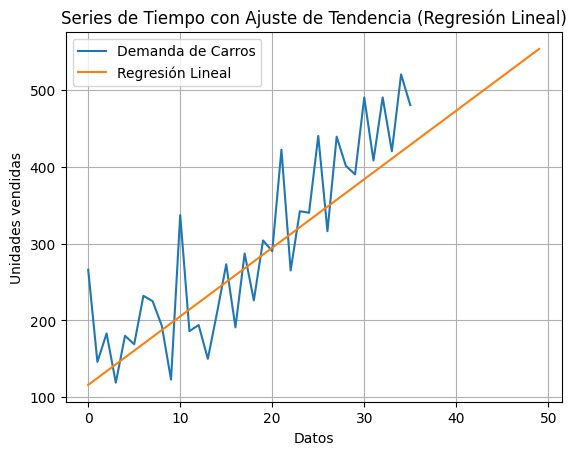

In [13]:
#Graficamos varios de los resultados
plt.plot(df.iloc[:, 2], label = 'Demanda de Carros')
plt.plot(y, label = 'Regresión Lineal')
plt.grid()
plt.legend(loc = 'best')
plt.title('Series de Tiempo con Ajuste de Tendencia (Regresión Lineal)')
plt.xlabel("Datos")
plt.ylabel("Unidades vendidas")
plt.show()

#### Referencias

*   Heizer, J., & Render, B. (2004). Principios de administración de operaciones.
*   Lind, D. A., Marchal, W. G., & Wathen, S. A. (2005). Estadística aplicada a los negocios y a la economía.